In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = []
    for row in data:
        result.append(row[index])
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

# Test the function
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.1, 300.5, 78.9]


In [2]:
print(X[0][:5])
print(X[1][:5])

[230.1, 44.5, 17.2, 151.5, 180.8]
[37.8, 39.3, 45.9, 41.3, 10.8]


In [3]:
print(X[1])

[37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1, 7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5, 29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6, 41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8, 9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5, 29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9, 1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3, 0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0, 39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2, 5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5, 1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6, 20.9, 20.1

In [4]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss_mse(y, y_hat):
    return (y - y_hat) ** 2

def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = -2 * xi * (y - y_hat)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = -2 * (y - y_hat)
    return dl_db

def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db


def compute_loss_mae(y, y_hat):
    return abs(y - y_hat)

def compute_gradient_wi_use_mae(xi, y, y_hat):
    dl_dwi = -xi * (1 if y > y_hat else -1)
    return dl_dwi

def compute_gradient_b_use_mae(y, y_hat):
    dl_db = -(1 if y > y_hat else -1)
    return dl_db

In [5]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [6]:
l = compute_loss_mse ( y_hat =1 , y =0.5)
print ( l )

0.25


In [7]:
# MSE loss
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

-1.0


In [8]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


In [9]:
after_wi = update_weight_wi ( wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print ( after_wi )

1.000005


In [10]:
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )

0.50001


In [11]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [12]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)

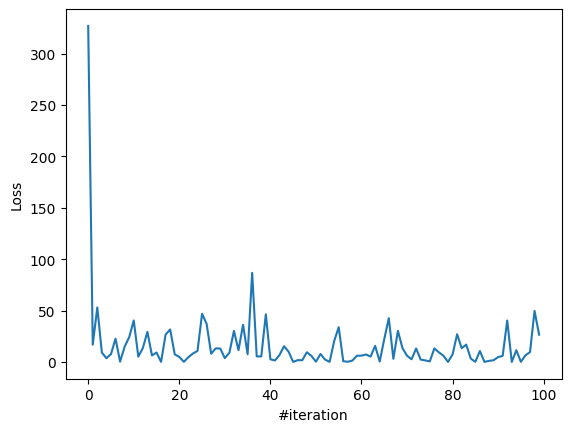

In [13]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [14]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
print ( w1 , w2 , w3 )

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [15]:
# Given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

# Prepare data
X, y = prepare_data('advertising.csv')

# Implement linear regression
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

# Predict sales
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'Predicted sales is {sales}')


Predicted sales is 8.176413319549823


In [16]:
# Compute loss using Mean Absolute Error (MAE)
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [22]:
def implement_linear_regression_use_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi_use_mae(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi_use_mae(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi_use_mae(x3, y, y_hat)
            dl_db = compute_gradient_b_use_mae(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)

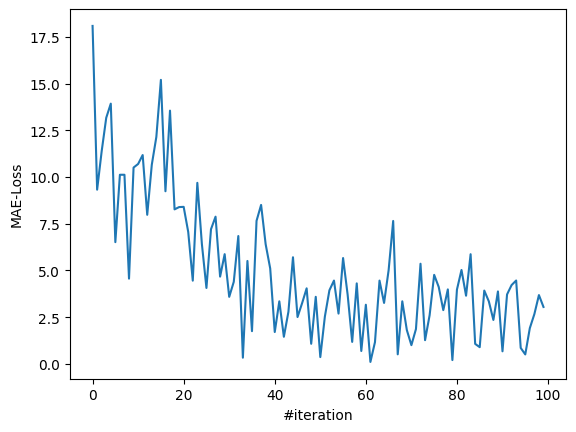

In [23]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_use_mae(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("MAE-Loss")
plt.show()

In [19]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    # Initialize parameters (weights and bias)
    w1, w2, w3, b = initialize_params()
    N = len(y_data)  # Number of samples
    
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            
            # Compute predicted output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # Compute loss
            loss = compute_loss_mse(y, y_hat)
            
            # Accumulate total loss
            loss_total += loss
            
            # Compute gradients for w1, w2, w3, and b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
        
        # After processing N samples, update parameters using gradient descent
        w1 -= lr * (dw1_total / N)
        w2 -= lr * (dw2_total / N)
        w3 -= lr * (dw3_total / N)
        b -= lr * (db_total / N)
        
        # Logging the average loss for the epoch
        losses.append(loss_total / N)
    
    return w1, w2, w3, b, losses

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

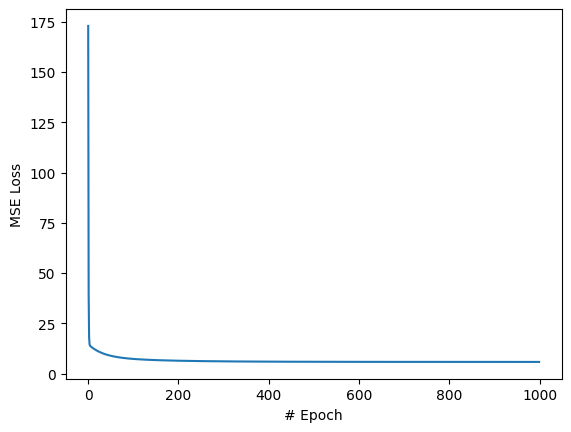

In [20]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, 
                                                               epoch_max=1000, 
                                                               lr=1e-5)

# Print the loss values
print(losses)

# Plot the loss curve
plt.plot(losses)
plt.xlabel("# Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [21]:
X, y = prepare_data('advertising.csv')

# Using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y,
    epoch_max=1000,
    lr=1e-5
)

print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403
